In [1]:
import numpy as np 
import seaborn as sns
import pandas as pd
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
#Get Data
dataset = pd.read_csv('desktop/v_shipment.csv')
dataset

/Users/barankilic/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3,17,40,41,42,43,47,48,50,51,52,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,value_currency,latest_status,shipper_note,updatedby,updatedat,createdat,order_id,pricing_id,totalkgds,...,total_cost_amount_in_eur,total_cost_amount_in_usd,eur_tl,usd_tl,eur_usd,price_base_amount_in_tl,price_base_amount_in_usd,price_base_amount_in_eur,assigned_trip_count,routes
0,PS6AP2DU,EUR,CANCELED,NaN,NaN,2022-02-11 11:14:41.602,2022-02-11 11:10:22.380,NaN,620643c46ecc56658317d86a,465.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,İstanbul_Berlin
1,TC0KXIOZ,TRY,CANCELED,NaN,NaN,2022-02-17 13:55:37.242,2022-02-14 09:19:45.624,NaN,620a1e7a9fa329591220165a,5907.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,İstanbul_Antalya
2,M4AH4DP8,TRY,CANCELED,NaN,NaN,2022-02-17 13:49:35.448,2022-02-17 13:36:29.193,NaN,620e4f40d1ddb926d6162e16,8000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,İstanbul_Rotterdam
3,3OM42TU0,TRY,CANCELED,NaN,NaN,2022-02-07 07:15:22.752,2022-02-05 13:16:38.813,NaN,61fe787b4df0683a0fc34bad,448.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,İstanbul_Berlin
4,ZK0BMR15,EUR,OPEN,NaN,NaN,2022-02-17 11:17:17.628,2022-02-17 09:45:20.166,NaN,620e1914c6ac5460e59eb2b4,1700.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,520.00,NaN,Ankara_Essen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47364,HPS7J0JL,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.430,NaN,5e8c5f5b76cad97764139545,1792.00,...,NaN,NaN,7.3367,6.7504,1.086854,1668.0,247.10,227.35,NaN,İstanbul_Iğdır
47365,SOW64CCW,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.420,NaN,5e8c5f5b76cad97764139545,896.00,...,NaN,NaN,7.3367,6.7504,1.086854,397.0,58.81,54.11,NaN,İstanbul_Konya
47366,O43HKT0V,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.430,NaN,5e8c5f5b76cad97764139545,448.00,...,NaN,NaN,7.3367,6.7504,1.086854,499.0,73.92,68.01,NaN,İstanbul_Kars
47367,1M5A3HY6,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.420,NaN,5e8c5f5b76cad97764139545,896.00,...,NaN,NaN,7.3367,6.7504,1.086854,627.0,92.88,85.46,NaN,İstanbul_Diyarbakır


In [3]:
dataset = dataset[dataset.invoice_company_title != 'TRENDYOL LOJISTIK A.Ş']
#dataset = dataset[dataset.invoice_company_title != 'KARSAC HAVALANDIRMA ISITMA SOGUTMA TAAHHÜT SAN.VE TIC.LTD.STI']
#dataset = dataset[dataset.invoice_company_title != 'OTOKOÇ OTOMOTİV TİC. VE SAN A.Ş. BİRMOT']
#dataset = dataset[dataset.invoice_company_title != 'OMSAN LOJİSTİK A.Ş.']
#dataset = dataset[dataset.invoice_company_title != 'KUEHNE NAGEL NAKLİYAT LTD ŞTİ - INTERMODAL']

dataset

,id,value_currency,latest_status,shipper_note,updatedby,updatedat,createdat,order_id,pricing_id,totalkgds,...,total_cost_amount_in_eur,total_cost_amount_in_usd,eur_tl,usd_tl,eur_usd,price_base_amount_in_tl,price_base_amount_in_usd,price_base_amount_in_eur,assigned_trip_count,routes
0,PS6AP2DU,EUR,CANCELED,NaN,NaN,2022-02-11 11:14:41.602,2022-02-11 11:10:22.380,NaN,620643c46ecc56658317d86a,465.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,İstanbul_Berlin
1,TC0KXIOZ,TRY,CANCELED,NaN,NaN,2022-02-17 13:55:37.242,2022-02-14 09:19:45.624,NaN,620a1e7a9fa329591220165a,5907.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,İstanbul_Antalya
2,M4AH4DP8,TRY,CANCELED,NaN,NaN,2022-02-17 13:49:35.448,2022-02-17 13:36:29.193,NaN,620e4f40d1ddb926d6162e16,8000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,İstanbul_Rotterdam
3,3OM42TU0,TRY,CANCELED,NaN,NaN,2022-02-07 07:15:22.752,2022-02-05 13:16:38.813,NaN,61fe787b4df0683a0fc34bad,448.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,İstanbul_Berlin
4,ZK0BMR15,EUR,OPEN,NaN,NaN,2022-02-17 11:17:17.628,2022-02-17 09:45:20.166,NaN,620e1914c6ac5460e59eb2b4,1700.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,520.00,NaN,Ankara_Essen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47364,HPS7J0JL,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.430,NaN,5e8c5f5b76cad97764139545,1792.00,...,NaN,NaN,7.3367,6.7504,1.086854,1668.0,247.10,227.35,NaN,İstanbul_Iğdır
47365,SOW64CCW,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.420,NaN,5e8c5f5b76cad97764139545,896.00,...,NaN,NaN,7.3367,6.7504,1.086854,397.0,58.81,54.11,NaN,İstanbul_Konya
47366,O43HKT0V,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.430,NaN,5e8c5f5b76cad97764139545,448.00,...,NaN,NaN,7.3367,6.7504,1.086854,499.0,73.92,68.01,NaN,İstanbul_Kars
47367,1M5A3HY6,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.420,NaN,5e8c5f5b76cad97764139545,896.00,...,NaN,NaN,7.3367,6.7504,1.086854,627.0,92.88,85.46,NaN,İstanbul_Diyarbakır


In [4]:
#dataset = dataset[dataset.invoice_company_title != 'OTOKOÇ OTOMOTİV TİC. VE SAN A.Ş. BİRMOT']
dataset


,id,value_currency,latest_status,shipper_note,updatedby,updatedat,createdat,order_id,pricing_id,totalkgds,...,total_cost_amount_in_eur,total_cost_amount_in_usd,eur_tl,usd_tl,eur_usd,price_base_amount_in_tl,price_base_amount_in_usd,price_base_amount_in_eur,assigned_trip_count,routes
0,PS6AP2DU,EUR,CANCELED,NaN,NaN,2022-02-11 11:14:41.602,2022-02-11 11:10:22.380,NaN,620643c46ecc56658317d86a,465.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,İstanbul_Berlin
1,TC0KXIOZ,TRY,CANCELED,NaN,NaN,2022-02-17 13:55:37.242,2022-02-14 09:19:45.624,NaN,620a1e7a9fa329591220165a,5907.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,İstanbul_Antalya
2,M4AH4DP8,TRY,CANCELED,NaN,NaN,2022-02-17 13:49:35.448,2022-02-17 13:36:29.193,NaN,620e4f40d1ddb926d6162e16,8000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,İstanbul_Rotterdam
3,3OM42TU0,TRY,CANCELED,NaN,NaN,2022-02-07 07:15:22.752,2022-02-05 13:16:38.813,NaN,61fe787b4df0683a0fc34bad,448.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,İstanbul_Berlin
4,ZK0BMR15,EUR,OPEN,NaN,NaN,2022-02-17 11:17:17.628,2022-02-17 09:45:20.166,NaN,620e1914c6ac5460e59eb2b4,1700.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,520.00,NaN,Ankara_Essen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47364,HPS7J0JL,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.430,NaN,5e8c5f5b76cad97764139545,1792.00,...,NaN,NaN,7.3367,6.7504,1.086854,1668.0,247.10,227.35,NaN,İstanbul_Iğdır
47365,SOW64CCW,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.420,NaN,5e8c5f5b76cad97764139545,896.00,...,NaN,NaN,7.3367,6.7504,1.086854,397.0,58.81,54.11,NaN,İstanbul_Konya
47366,O43HKT0V,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.430,NaN,5e8c5f5b76cad97764139545,448.00,...,NaN,NaN,7.3367,6.7504,1.086854,499.0,73.92,68.01,NaN,İstanbul_Kars
47367,1M5A3HY6,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.420,NaN,5e8c5f5b76cad97764139545,896.00,...,NaN,NaN,7.3367,6.7504,1.086854,627.0,92.88,85.46,NaN,İstanbul_Diyarbakır


In [5]:
# Get Delivered Shipments
accepted = ('APPROVED', 'IN_TRANSIT', 'IN_DELIVERY', 'IN_CROSSDOCK', 'DELIVERED', 'IN_PICKUP')

dataset = dataset[dataset.latest_status.isin(accepted)]
dataset

,id,value_currency,latest_status,shipper_note,updatedby,updatedat,createdat,order_id,pricing_id,totalkgds,...,total_cost_amount_in_eur,total_cost_amount_in_usd,eur_tl,usd_tl,eur_usd,price_base_amount_in_tl,price_base_amount_in_usd,price_base_amount_in_eur,assigned_trip_count,routes
17,UELFE3N7,TRY,APPROVED,iç nakliye,NaN,2022-02-15 12:48:27.560,2022-02-15 11:15:24.685,NaN,620b8b420010845a7253d5c6,24000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.00,1.0,Mersin_İstanbul
18,T5L16VEU,TRY,APPROVED,iç nakliye,NaN,2022-02-15 12:48:39.953,2022-02-15 11:15:24.685,NaN,620b8b420010845a7253d5c6,24000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.00,1.0,Mersin_İstanbul
19,7UW6C5LA,TRY,APPROVED,NaN,NaN,2022-02-17 12:55:14.152,2022-02-17 12:36:58.196,NaN,620e4165775c6e6c2853107a,8500.00,...,NaN,NaN,NaN,NaN,NaN,1750.0,NaN,NaN,1.0,İstanbul_Kocaeli
22,WKDIKX54,TRY,APPROVED,Brandasının sağlam olması gerekiyor.,NaN,2022-02-18 07:02:06.574,2022-02-18 06:38:27.200,Y22-2033,620f3ed6179cc56359f8b8f2,15000.00,...,NaN,NaN,NaN,NaN,NaN,3725.0,NaN,NaN,1.0,Kocaeli_Manisa
28,YOV8PTAB,TRY,APPROVED,NaN,NaN,2022-02-17 09:57:38.270,2022-02-17 09:54:51.406,NaN,620e1b67b35a1801923ec521,1854.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,290.00,NaN,İstanbul_Stara Zagora
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47364,HPS7J0JL,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.430,NaN,5e8c5f5b76cad97764139545,1792.00,...,NaN,NaN,7.3367,6.7504,1.086854,1668.0,247.10,227.35,NaN,İstanbul_Iğdır
47365,SOW64CCW,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.420,NaN,5e8c5f5b76cad97764139545,896.00,...,NaN,NaN,7.3367,6.7504,1.086854,397.0,58.81,54.11,NaN,İstanbul_Konya
47366,O43HKT0V,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.430,NaN,5e8c5f5b76cad97764139545,448.00,...,NaN,NaN,7.3367,6.7504,1.086854,499.0,73.92,68.01,NaN,İstanbul_Kars
47367,1M5A3HY6,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.420,NaN,5e8c5f5b76cad97764139545,896.00,...,NaN,NaN,7.3367,6.7504,1.086854,627.0,92.88,85.46,NaN,İstanbul_Diyarbakır


In [6]:
#Get Spot Prices
price_type = ['SPOT']
#dataset = dataset[dataset.price_type.isin(price_type)]
dataset

,id,value_currency,latest_status,shipper_note,updatedby,updatedat,createdat,order_id,pricing_id,totalkgds,...,total_cost_amount_in_eur,total_cost_amount_in_usd,eur_tl,usd_tl,eur_usd,price_base_amount_in_tl,price_base_amount_in_usd,price_base_amount_in_eur,assigned_trip_count,routes
17,UELFE3N7,TRY,APPROVED,iç nakliye,NaN,2022-02-15 12:48:27.560,2022-02-15 11:15:24.685,NaN,620b8b420010845a7253d5c6,24000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.00,1.0,Mersin_İstanbul
18,T5L16VEU,TRY,APPROVED,iç nakliye,NaN,2022-02-15 12:48:39.953,2022-02-15 11:15:24.685,NaN,620b8b420010845a7253d5c6,24000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.00,1.0,Mersin_İstanbul
19,7UW6C5LA,TRY,APPROVED,NaN,NaN,2022-02-17 12:55:14.152,2022-02-17 12:36:58.196,NaN,620e4165775c6e6c2853107a,8500.00,...,NaN,NaN,NaN,NaN,NaN,1750.0,NaN,NaN,1.0,İstanbul_Kocaeli
22,WKDIKX54,TRY,APPROVED,Brandasının sağlam olması gerekiyor.,NaN,2022-02-18 07:02:06.574,2022-02-18 06:38:27.200,Y22-2033,620f3ed6179cc56359f8b8f2,15000.00,...,NaN,NaN,NaN,NaN,NaN,3725.0,NaN,NaN,1.0,Kocaeli_Manisa
28,YOV8PTAB,TRY,APPROVED,NaN,NaN,2022-02-17 09:57:38.270,2022-02-17 09:54:51.406,NaN,620e1b67b35a1801923ec521,1854.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,290.00,NaN,İstanbul_Stara Zagora
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47364,HPS7J0JL,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.430,NaN,5e8c5f5b76cad97764139545,1792.00,...,NaN,NaN,7.3367,6.7504,1.086854,1668.0,247.10,227.35,NaN,İstanbul_Iğdır
47365,SOW64CCW,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.420,NaN,5e8c5f5b76cad97764139545,896.00,...,NaN,NaN,7.3367,6.7504,1.086854,397.0,58.81,54.11,NaN,İstanbul_Konya
47366,O43HKT0V,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.430,NaN,5e8c5f5b76cad97764139545,448.00,...,NaN,NaN,7.3367,6.7504,1.086854,499.0,73.92,68.01,NaN,İstanbul_Kars
47367,1M5A3HY6,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.420,NaN,5e8c5f5b76cad97764139545,896.00,...,NaN,NaN,7.3367,6.7504,1.086854,627.0,92.88,85.46,NaN,İstanbul_Diyarbakır


In [7]:
# GET pickup and dropoffs
routes = ('İstanbul_İstanbul', 'İstanbul_İzmir', 'İstanbul_Ankara', 'İstanbul_Kocaeli', 'İstanbul_Bursa', 'İstanbul_Antalya', 'Kocaeli_İstanbul', 'İstanbul_Adana','İstanbul_Tekirdağ','İstanbul_Gaziantep','İstanbul_Balıkesir','İstanbul_Eskişehir','İstanbul_Muğla','Kocaeli_İzmir','İstanbul_Mersin','İstanbul_Sakarya','İstanbul_Samsun','Kocaeli_Ankara','İstanbul_Denizli','İstanbul_Kayseri')
dataset = dataset[dataset.routes.isin(routes)]
dataset

,id,value_currency,latest_status,shipper_note,updatedby,updatedat,createdat,order_id,pricing_id,totalkgds,...,total_cost_amount_in_eur,total_cost_amount_in_usd,eur_tl,usd_tl,eur_usd,price_base_amount_in_tl,price_base_amount_in_usd,price_base_amount_in_eur,assigned_trip_count,routes
19,7UW6C5LA,TRY,APPROVED,NaN,NaN,2022-02-17 12:55:14.152,2022-02-17 12:36:58.196,NaN,620e4165775c6e6c2853107a,8500.0,...,NaN,NaN,NaN,NaN,NaN,1750.0,NaN,NaN,1.0,İstanbul_Kocaeli
36,OPRPPJLC,TRY,APPROVED,NaN,NaN,2022-02-18 07:50:07.630,2022-02-17 11:52:53.991,NaN,620e37097f88244abc95194a,750.0,...,NaN,NaN,15.4899,13.6280,1.136623,135.0,9.91,8.72,NaN,İstanbul_Kocaeli
44,LZCXU45R,TRY,IN_PICKUP,NaN,NaN,2022-02-17 12:24:48.700,2022-02-17 12:16:11.160,NaN,NaN,1152.0,...,0.01,0.01,15.4899,13.6280,1.136623,664.0,48.72,42.87,2.0,Kocaeli_İzmir
51,KW6ELGIV,TRY,IN_PICKUP,NaN,NaN,2022-02-18 07:44:16.564,2022-02-18 07:37:46.718,5100244189,NaN,34.0,...,4.96,5.64,15.4899,13.6280,1.136623,409.5,30.05,26.44,2.0,İstanbul_Samsun
52,2ANOSFU7,TRY,IN_PICKUP,NaN,NaN,2022-02-18 07:44:16.564,2022-02-18 07:37:46.838,5100244164,NaN,2060.0,...,300.55,341.61,15.4899,13.6280,1.136623,679.8,49.88,43.89,2.0,İstanbul_İstanbul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47349,8GINZKBD,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.420,NaN,5e8c5f5b76cad97764139545,448.0,...,NaN,NaN,7.3367,6.7504,1.086854,243.0,36.00,33.12,NaN,İstanbul_Kayseri
47350,0HIH977T,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.440,NaN,5e8c5f5b76cad97764139545,448.0,...,NaN,NaN,7.3367,6.7504,1.086854,211.0,31.26,28.76,NaN,İstanbul_İstanbul
47351,GJB7JF6V,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.450,NaN,5e8c5f5b76cad97764139545,448.0,...,NaN,NaN,7.3367,6.7504,1.086854,283.0,41.92,38.57,NaN,İstanbul_Muğla
47355,02GQTXWP,TRY,DELIVERED,NaN,5fb29424ebbf435b44d7b9a2,2021-12-01 16:00:07.453,2020-04-07 12:17:38.440,NaN,5e8c5f5b76cad97764139545,896.0,...,NaN,NaN,7.3367,6.7504,1.086854,363.0,53.77,49.48,NaN,İstanbul_İstanbul


In [8]:
# Get Applicable Columns
data = pd.concat([dataset['latest_status'],dataset['totalkgds'],dataset['pickup_city'],dataset['dropoff_city'] ,dataset['pickup_address_type'], dataset['dropoff_address_type'],
                  dataset['category'], dataset['price_type'], 
                  dataset['shipment_type'], dataset['vehicle_type'],dataset['vehicle_body_type'],
                  dataset['vehicle_package_type'], dataset['vehicle_way_of_loading'],
                  dataset['vehicle_tonnage_per_vehicle'],dataset['payment_option'],
                  dataset['invoice_type'], dataset['tenant_signup_flow'], 
                  dataset['total_cost_amount_in_tl'], dataset['usd_tl'],
                  dataset['price_base_amount_in_tl']
                 ,dataset['routes']], axis = 1)
data

,latest_status,totalkgds,pickup_city,dropoff_city,pickup_address_type,dropoff_address_type,category,price_type,shipment_type,vehicle_type,...,vehicle_package_type,vehicle_way_of_loading,vehicle_tonnage_per_vehicle,payment_option,invoice_type,tenant_signup_flow,total_cost_amount_in_tl,usd_tl,price_base_amount_in_tl,routes
19,APPROVED,8500.0,İstanbul,Kocaeli,WORKSPACE,WAREHOUSE,DRY_FOOD,MANUAL,FTL,_10_WHEELER,...,NaN,FROM_THE_RAMP_BY_TRANSPALLET_FORKLIFT,8.5,PAY_LATER,NaN,SELF_SIGNUP,NaN,NaN,1750.0,İstanbul_Kocaeli
36,APPROVED,750.0,İstanbul,Kocaeli,FACTORY,WAREHOUSE,DRY_FOOD,NaN,LTL,NaN,...,NaN,NaN,NaN,PAY_LATER,NaN,SELF_SIGNUP,NaN,13.6280,135.0,İstanbul_Kocaeli
44,IN_PICKUP,1152.0,Kocaeli,İzmir,WAREHOUSE,OTHER,OTHER,NaN,LTL,NaN,...,NaN,NaN,NaN,PAY_LATER,NaN,SELF_SIGNUP,0.13,13.6280,664.0,Kocaeli_İzmir
51,IN_PICKUP,34.0,İstanbul,Samsun,FACTORY,WAREHOUSE,PLASTIC,NaN,LTL,NaN,...,NaN,NaN,NaN,PAY_LATER,NaN,SELF_SIGNUP,76.84,13.6280,409.5,İstanbul_Samsun
52,IN_PICKUP,2060.0,İstanbul,İstanbul,FACTORY,WAREHOUSE,PLASTIC,NaN,LTL,NaN,...,NaN,NaN,NaN,PAY_LATER,NaN,SELF_SIGNUP,4655.50,13.6280,679.8,İstanbul_İstanbul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47349,DELIVERED,448.0,İstanbul,Kayseri,WAREHOUSE,OTHER,DRY_FOOD,NaN,LTL,NaN,...,NaN,NaN,NaN,PAY_LATER,NaN,SELF_SIGNUP,NaN,6.7504,243.0,İstanbul_Kayseri
47350,DELIVERED,448.0,İstanbul,İstanbul,WAREHOUSE,OTHER,DRY_FOOD,NaN,LTL,NaN,...,NaN,NaN,NaN,PAY_LATER,NaN,SELF_SIGNUP,NaN,6.7504,211.0,İstanbul_İstanbul
47351,DELIVERED,448.0,İstanbul,Muğla,WAREHOUSE,OTHER,DRY_FOOD,NaN,LTL,NaN,...,NaN,NaN,NaN,PAY_LATER,NaN,SELF_SIGNUP,NaN,6.7504,283.0,İstanbul_Muğla
47355,DELIVERED,896.0,İstanbul,İstanbul,WAREHOUSE,OTHER,DRY_FOOD,NaN,LTL,NaN,...,NaN,NaN,NaN,PAY_LATER,NaN,SELF_SIGNUP,NaN,6.7504,363.0,İstanbul_İstanbul


In [9]:
#Split Data by Shipment Type
data_ftl = data[data.shipment_type == 'FTL']

In [10]:
data_ftl = data_ftl.drop(columns = 'shipment_type')
data_ftl = data_ftl.drop(columns = 'latest_status')
data_ftl = data_ftl.drop(columns = 'price_base_amount_in_tl')
data_ftl = data_ftl.drop(columns = 'price_type')
data_ftl = data_ftl.drop(columns = 'payment_option')
data_ftl = data_ftl.drop(columns = 'invoice_type')
data_ftl = data_ftl.drop(columns = 'tenant_signup_flow')



In [11]:
data_ftl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 19 to 35181
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   totalkgds                    1121 non-null   float64
 1   pickup_city                  1121 non-null   object 
 2   dropoff_city                 1121 non-null   object 
 3   pickup_address_type          1121 non-null   object 
 4   dropoff_address_type         1121 non-null   object 
 5   category                     1121 non-null   object 
 6   vehicle_type                 1121 non-null   object 
 7   vehicle_body_type            1121 non-null   object 
 8   vehicle_package_type         1096 non-null   object 
 9   vehicle_way_of_loading       1121 non-null   object 
 10  vehicle_tonnage_per_vehicle  1121 non-null   float64
 11  total_cost_amount_in_tl      1106 non-null   float64
 12  usd_tl                       1120 non-null   float64
 13  routes          

In [12]:
labelencoder = LabelEncoder()
data_ftl['category'] = labelencoder.fit_transform(data_ftl['category'])
data_ftl['vehicle_type'] = labelencoder.fit_transform(data_ftl['vehicle_type'])
data_ftl['vehicle_body_type'] = labelencoder.fit_transform(data_ftl['vehicle_body_type'])
data_ftl['vehicle_package_type'] = labelencoder.fit_transform(data_ftl['vehicle_package_type'])
data_ftl['vehicle_way_of_loading'] = labelencoder.fit_transform(data_ftl['vehicle_way_of_loading'])
data_ftl['pickup_address_type'] = labelencoder.fit_transform(data_ftl['pickup_address_type'])
data_ftl['dropoff_address_type'] = labelencoder.fit_transform(data_ftl['dropoff_address_type'])
data_ftl['routes'] = labelencoder.fit_transform(data_ftl['routes'])
data_ftl['pickup_city'] = labelencoder.fit_transform(data_ftl['pickup_city'])
data_ftl['dropoff_city'] = labelencoder.fit_transform(data_ftl['dropoff_city'])


data_ftl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 19 to 35181
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   totalkgds                    1121 non-null   float64
 1   pickup_city                  1121 non-null   int64  
 2   dropoff_city                 1121 non-null   int64  
 3   pickup_address_type          1121 non-null   int64  
 4   dropoff_address_type         1121 non-null   int64  
 5   category                     1121 non-null   int64  
 6   vehicle_type                 1121 non-null   int64  
 7   vehicle_body_type            1121 non-null   int64  
 8   vehicle_package_type         1121 non-null   int64  
 9   vehicle_way_of_loading       1121 non-null   int64  
 10  vehicle_tonnage_per_vehicle  1121 non-null   float64
 11  total_cost_amount_in_tl      1106 non-null   float64
 12  usd_tl                       1120 non-null   float64
 13  routes          

In [13]:
data_ftl = data_ftl.dropna()
data_ftl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1106 entries, 61 to 35181
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   totalkgds                    1106 non-null   float64
 1   pickup_city                  1106 non-null   int64  
 2   dropoff_city                 1106 non-null   int64  
 3   pickup_address_type          1106 non-null   int64  
 4   dropoff_address_type         1106 non-null   int64  
 5   category                     1106 non-null   int64  
 6   vehicle_type                 1106 non-null   int64  
 7   vehicle_body_type            1106 non-null   int64  
 8   vehicle_package_type         1106 non-null   int64  
 9   vehicle_way_of_loading       1106 non-null   int64  
 10  vehicle_tonnage_per_vehicle  1106 non-null   float64
 11  total_cost_amount_in_tl      1106 non-null   float64
 12  usd_tl                       1106 non-null   float64
 13  routes          

In [14]:
data_ftl = data_ftl.dropna()
data_ftl.totalkgds = data_ftl.totalkgds.astype(int)
data_ftl.vehicle_tonnage_per_vehicle = data_ftl.vehicle_tonnage_per_vehicle.astype(int)
data_ftl.total_cost_amount_in_tl = data_ftl.total_cost_amount_in_tl.astype(int)
data_ftl.usd_tl = data_ftl.usd_tl.astype(int)

data_ftl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1106 entries, 61 to 35181
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   totalkgds                    1106 non-null   int64
 1   pickup_city                  1106 non-null   int64
 2   dropoff_city                 1106 non-null   int64
 3   pickup_address_type          1106 non-null   int64
 4   dropoff_address_type         1106 non-null   int64
 5   category                     1106 non-null   int64
 6   vehicle_type                 1106 non-null   int64
 7   vehicle_body_type            1106 non-null   int64
 8   vehicle_package_type         1106 non-null   int64
 9   vehicle_way_of_loading       1106 non-null   int64
 10  vehicle_tonnage_per_vehicle  1106 non-null   int64
 11  total_cost_amount_in_tl      1106 non-null   int64
 12  usd_tl                       1106 non-null   int64
 13  routes                       1106 non-null   i

In [15]:
data_ftl = data_ftl.drop(columns = ['pickup_city', 'dropoff_city','vehicle_way_of_loading',
                                    'vehicle_tonnage_per_vehicle', 'vehicle_type','vehicle_body_type','usd_tl'])

In [16]:
X_train_ftl, X_test_ftl, y_train_ftl, y_test_ftl = train_test_split(data_ftl.drop(columns = 'total_cost_amount_in_tl'), data_ftl.total_cost_amount_in_tl, test_size=0.2, random_state=0)
X_train_ftl.shape, X_test_ftl.shape

((884, 6), (222, 6))

In [17]:
dtreg = DecisionTreeRegressor(random_state= 0)

In [18]:
dtreg.fit(X_train_ftl,y_train_ftl)

DecisionTreeRegressor(random_state=0)

In [19]:
predict_dtr = dtreg.predict(X_test_ftl)

In [20]:
r_square = metrics.r2_score(y_test_ftl, predict_dtr)
r_square

0.7729234336453094

In [21]:
X_test_ftl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 31468 to 21345
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   totalkgds             222 non-null    int64
 1   pickup_address_type   222 non-null    int64
 2   dropoff_address_type  222 non-null    int64
 3   category              222 non-null    int64
 4   vehicle_package_type  222 non-null    int64
 5   routes                222 non-null    int64
dtypes: int64(6)
memory usage: 12.1 KB


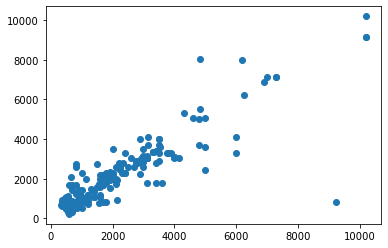

In [22]:
plt.scatter(y_test_ftl,predict_dtr)